In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [19]:
train_data = pd.read_csv("bag_train.csv")
test_data = pd.read_csv("bag_student_test.csv")

In [20]:
train_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Nike,Leather,Large,7.0,No,No,Tote,Black,13.051480,128.910685
1,Adidas,Polyester,Small,10.0,No,Yes,Messenger,Red,14.767330,87.747577
2,Adidas,Polyester,NaN,3.0,Yes,Yes,Backpack,Gray,18.437242,146.407569
3,Nike,Canvas,Small,7.0,Yes,Yes,Messenger,Blue,25.752179,46.413368
4,NaN,Leather,Medium,8.0,No,Yes,Messenger,Pink,7.945840,113.892462


In [21]:
train_data.describe()

,Compartments,Weight Capacity (kg),Price
count,23686.000000,23695.000000,24937.000000
mean,5.520814,17.541077,81.762189
std,2.874368,7.522552,39.184234
min,1.000000,5.000000,15.000000
25%,3.000000,11.073998,47.656574
50%,6.000000,17.599300,81.496143
75%,8.000000,24.056263,115.445080
max,10.000000,30.000000,150.000000


Detecting missing values and filling missing values separately for numerical and Categorical data

In [23]:
train_data.isnull().sum()

Brand                   1294
Material                1268
Size                    1229
Compartments            1251
Laptop Compartment      1229
Waterproof              1274
Style                   1249
Color                   1197
Weight Capacity (kg)    1242
Price                      0
dtype: int64

In [24]:
cat_cols = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
train_data[cat_cols] = train_data[cat_cols].fillna("Unknown")
train_data.isnull().sum()

Brand                      0
Material                   0
Size                       0
Compartments            1251
Laptop Compartment         0
Waterproof                 0
Style                      0
Color                      0
Weight Capacity (kg)    1242
Price                      0
dtype: int64

In [25]:
num_cols = ["Compartments", "Weight Capacity (kg)"]
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
train_data.isnull().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

we need to transform and preprocess data

In [27]:
train_data_num = train_data.select_dtypes(include=["number"])
train_data_cat = train_data.select_dtypes(include=["object"])

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}  
cat_cols = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
for col in cat_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col]) 
    label_encoders[col] = le 
train_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,2,1,0,7.0,0,0,2,0,13.051480,128.910685
1,0,3,2,10.0,0,2,1,5,14.767330,87.747577
2,0,3,3,3.0,2,2,0,2,18.437242,146.407569
3,2,0,2,7.0,2,2,1,1,25.752179,46.413368
4,5,1,1,8.0,0,2,1,4,7.945840,113.892462


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ["Compartments", "Weight Capacity (kg)"]
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
train_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,2,1,0,0.519096,0,0,2,0,-0.612668,128.910685
1,0,3,2,1.589288,0,2,1,5,-0.378667,87.747577
2,0,3,3,-0.907827,2,2,0,2,0.121820,146.407569
3,2,0,2,0.519096,2,2,1,1,1.119399,46.413368
4,5,1,1,0.875826,0,2,1,4,-1.308953,113.892462


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data_num)
train_data_num = scaler.transform(train_data_num)
train_data_num = pd.DataFrame(train_data_num,
                           columns = scaler.feature_names_in_)

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
train_data_cat = encoder.fit_transform(train_data_cat)
train_data_cat = pd.DataFrame(train_data_cat,
                                   columns=encoder.get_feature_names_out())

In [32]:
train_data_pp = pd.concat([train_data_num, train_data_cat], axis=1)
train_data_pp

,Compartments,Weight Capacity (kg),Price,Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_Unknown,Material_Canvas,...,Style_Messenger,Style_Tote,Style_Unknown,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Color_Unknown
0,0.519096,-0.612668,1.203276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.589288,-0.378667,0.152753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.907827,0.121820,1.649813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.519096,1.119399,-0.902137,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.875826,-1.308953,0.819996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,1.232557,1.212687,1.378819,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24933,0.875826,-1.710694,0.959544,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24934,1.589288,-0.291112,-1.527497,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24935,-0.907827,1.515415,-0.229216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


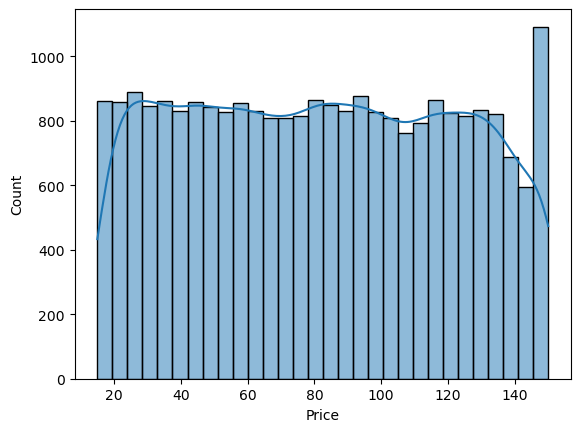

In [34]:
tar_col = "Price"
sns.histplot(train_data[tar_col], bins=30, kde=True)
plt.show()

Data Splitting

In [36]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=["Price"])  
y = train_data["Price"] 
assert X.shape[0] == y.shape[0], "Mismatch in feature and target variable sizes!"
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (19949, 9), y_train shape: (19949,)


Detecting outliers for numerical and categorical data separately by using iqr method

In [38]:
train_data["Brand"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Brand
2    19.36%
4    19.20%
3    19.11%
1    18.66%
0    18.48%
5     5.19%
Name: proportion, dtype: object

In [39]:
train_data["Material"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Material
3    24.00%
1    23.82%
0    23.70%
2    23.39%
4     5.08%
Name: proportion, dtype: object

In [40]:
train_data["Size"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Size
1    32.28%
2    31.44%
0    31.36%
3     4.93%
Name: proportion, dtype: object

In [41]:
train_data["Laptop Compartment"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Laptop Compartment
0    47.92%
2    47.15%
1     4.93%
Name: proportion, dtype: object

In [42]:
train_data["Waterproof"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Waterproof
0    48.01%
2    46.88%
1     5.11%
Name: proportion, dtype: object

In [43]:
train_data["Style"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Style
2    31.97%
1    31.72%
0    31.30%
3     5.01%
Name: proportion, dtype: object

In [44]:
train_data["Color"].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

Color
2    16.26%
1    16.08%
3    15.84%
5    15.80%
0    15.78%
4    15.44%
6     4.80%
Name: proportion, dtype: object

<Axes: >

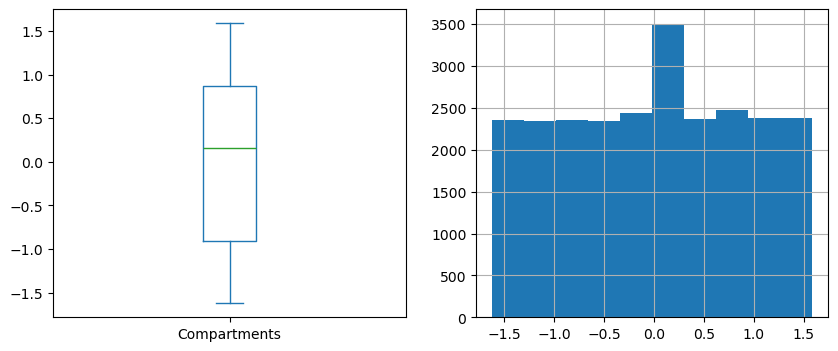

In [45]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
train_data["Compartments"].hist(ax=axs[1])
train_data["Compartments"].plot.box(ax=axs[0])

<Axes: >

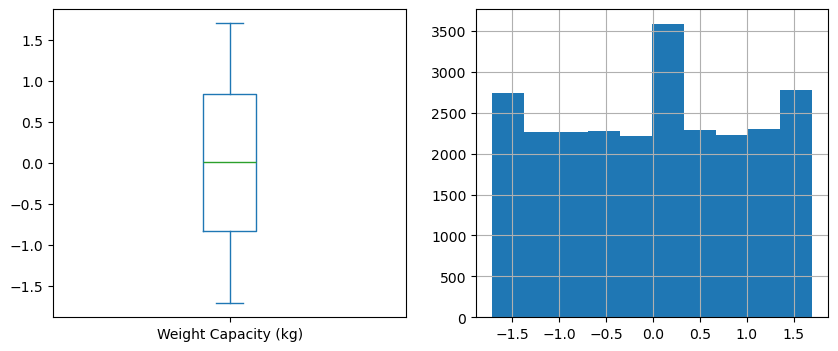

In [46]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
train_data["Weight Capacity (kg)"].hist(ax=axs[1])
train_data["Weight Capacity (kg)"].plot.box(ax=axs[0])

In [47]:
Z_culmen = (train_data["Compartments"] - train_data["Compartments"].mean()) / train_data["Compartments"].std()
Z_culmen

0        0.519085
1        1.589256
2       -0.907809
3        0.519085
4        0.875809
           ...   
24932    1.232532
24933    0.875809
24934    1.589256
24935   -0.907809
24936    0.519085
Name: Compartments, Length: 24937, dtype: float64

In [48]:
mask = (Z_culmen > 3) | (Z_culmen < -3)
train_data.loc[mask, "Compartments"]

Series([], Name: Compartments, dtype: float64)

In [49]:
q1 = train_data["Compartments"].quantile(0.25)
q3 = train_data["Compartments"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

In [50]:
mask = (train_data["Compartments"] < lower) | (train_data["Compartments"] > upper)
train_data.loc[mask, "Compartments"]

Series([], Name: Compartments, dtype: float64)

In [51]:
train_data.drop(index=[], inplace=True)
train_data = train_data.reset_index(drop=True)
train_data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,2,1,0,0.519096,0,0,2,0,-0.612668,128.910685
1,0,3,2,1.589288,0,2,1,5,-0.378667,87.747577
2,0,3,3,-0.907827,2,2,0,2,0.121820,146.407569
3,2,0,2,0.519096,2,2,1,1,1.119399,46.413368
4,5,1,1,0.875826,0,2,1,4,-1.308953,113.892462
...,...,...,...,...,...,...,...,...,...,...
24932,3,1,1,1.232557,2,0,0,1,1.212687,135.789067
24933,0,2,1,0.875826,0,2,1,3,-1.710694,119.360423
24934,3,2,1,1.589288,2,2,1,0,-0.291112,21.909577
24935,0,2,1,-0.907827,2,2,3,2,1.515415,72.780721


In [52]:
Z_culmen = (train_data["Weight Capacity (kg)"] - train_data["Weight Capacity (kg)"].mean()) / train_data["Weight Capacity (kg)"].std()
Z_culmen

0       -0.612655
1       -0.378660
2        0.121817
3        1.119377
4       -1.308927
           ...   
24932    1.212663
24933   -1.710660
24934   -0.291106
24935    1.515384
24936   -1.624694
Name: Weight Capacity (kg), Length: 24937, dtype: float64

In [53]:
mask = (Z_culmen > 3) | (Z_culmen < -3)
train_data.loc[mask, "Weight Capacity (kg)"]

Series([], Name: Weight Capacity (kg), dtype: float64)

In [54]:
q1 = train_data["Weight Capacity (kg)"].quantile(0.25)
q3 = train_data["Weight Capacity (kg)"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

In [55]:
mask = (train_data["Weight Capacity (kg)"] < lower) | (train_data["Weight Capacity (kg)"] > upper)
train_data.loc[mask, "Weight Capacity (kg)"]

Series([], Name: Weight Capacity (kg), dtype: float64)

In [56]:
train_data.drop(index=[], inplace=True)
train_data = train_data.reset_index(drop=True)
train_data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,2,1,0,0.519096,0,0,2,0,-0.612668,128.910685
1,0,3,2,1.589288,0,2,1,5,-0.378667,87.747577
2,0,3,3,-0.907827,2,2,0,2,0.121820,146.407569
3,2,0,2,0.519096,2,2,1,1,1.119399,46.413368
4,5,1,1,0.875826,0,2,1,4,-1.308953,113.892462
...,...,...,...,...,...,...,...,...,...,...
24932,3,1,1,1.232557,2,0,0,1,1.212687,135.789067
24933,0,2,1,0.875826,0,2,1,3,-1.710694,119.360423
24934,3,2,1,1.589288,2,2,1,0,-0.291112,21.909577
24935,0,2,1,-0.907827,2,2,3,2,1.515415,72.780721


In [57]:
train_data.duplicated().any()

False

Feature preprocessing and Feature transformation

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def preprocessing(X_train, X_val):
    num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
    cat_cols = X_train.select_dtypes(exclude=["float64", "int64"]).columns

    ct = ColumnTransformer([("numerical", StandardScaler(), num_cols),
                            ("categorical", OneHotEncoder(), cat_cols)])

    ct.fit(X_train)
    X_train_pp = ct.transform(X_train)
    X_val_pp = ct.transform(X_val)

    return X_train_pp, X_val_pp

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val) 

Model Training and Evaluation

In [62]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = lin_reg.predict(X_val)  
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 38.90031262808157
R2: -0.000794696965438213


In [65]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [66]:
y_pred = ridge_reg.predict(X_val)  
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 38.90031206063059
R2: -0.0007946677676302638


In [67]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [68]:
y_pred = knn.predict(X_val)  
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 42.12256326631814
R2: -0.17346028218410137


In [69]:
svr = SVR()  
svr.fit(X_train_scaled, y_train)

SVR()

In [70]:
y_pred = svr.predict(X_val)  
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


RMSE: 38.909163476745384
R2: -0.00125016323339322


In [71]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_pred = forest.predict(X_val)  
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 39.54629291418961
R2: -0.034309157464858187


In [73]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
y_pred = tree.predict(X_val)  
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 55.701576433749814
R2: -1.05198312637891


Comparing all Model Performance using bar graph

                                RMSE
Linear Regression          38.900313
Ridge Regression           38.900312
K-Nearest Neighbors        42.122563
Support Vector Regression  38.930528
Decision Tree              55.701576
Random Forest              39.546293


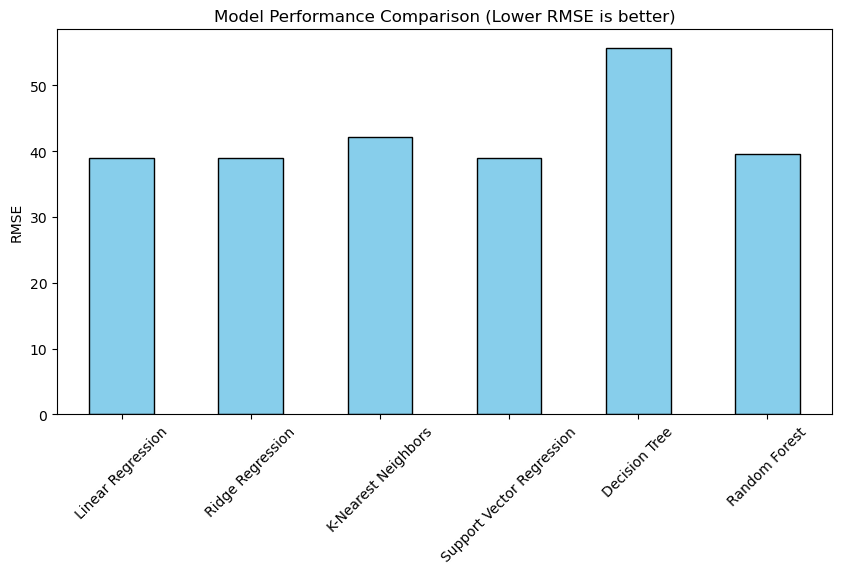

In [75]:
model_performance = {
    "Linear Regression": np.sqrt(mean_squared_error(y_val, lin_reg.predict(X_val))),
    "Ridge Regression": np.sqrt(mean_squared_error(y_val, ridge_reg.predict(X_val))),
    "K-Nearest Neighbors": np.sqrt(mean_squared_error(y_val, knn.predict(X_val))),
    "Support Vector Regression": np.sqrt(mean_squared_error(y_val, svr.predict(X_val_scaled))),  
    "Decision Tree": np.sqrt(mean_squared_error(y_val, tree.predict(X_val))),
    "Random Forest": np.sqrt(mean_squared_error(y_val, forest.predict(X_val)))
}
performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=["RMSE"])
print(performance_df)
plt.figure(figsize=(10, 5))
performance_df["RMSE"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylabel("RMSE")
plt.title("Model Performance Comparison (Lower RMSE is better)")
plt.xticks(rotation=45)
plt.show()